In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [5]:
def create_generator():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=5))
    model.add(Dense(15))
    g_in = Input(shape=5)
    g_out = model(g_in)
    return Model(g_in, g_out)

def create_discriminator():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=15))
    model.add(Dense(1))
    d_in = Input(shape=15)
    d_out = model(d_in)
    return Model(d_in, d_out)

def create_real(batch_size, output):
    a = np.random.uniform(1, 2, size=batch_size)[:, np.newaxis]
    real = a * np.power(output, 2) + (a-1)
    return real

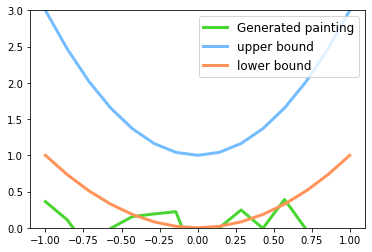

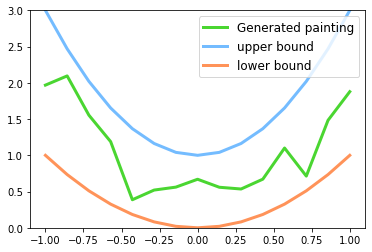

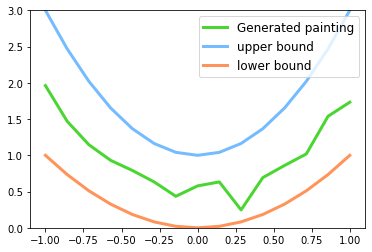

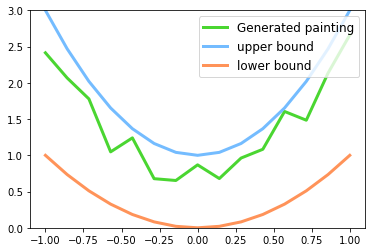

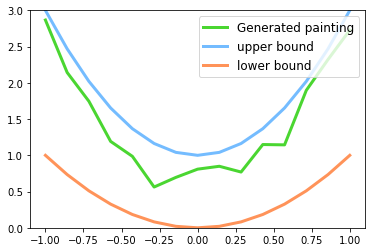

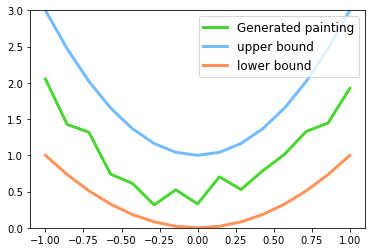

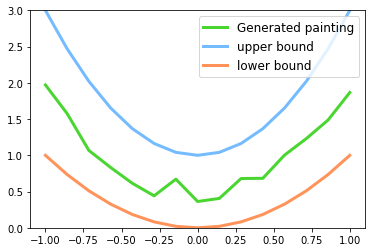

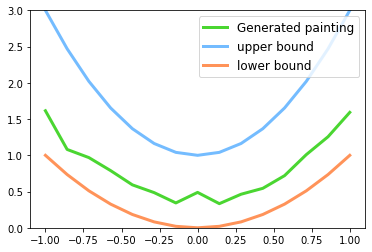

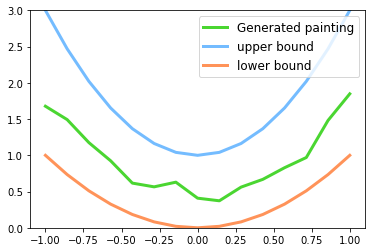

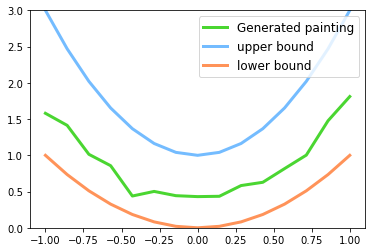

In [8]:
np.random.seed(1)
EPOCHS = 3000
BATCH_SIZE = 64
INPUT_DIM = 5             # think of this as number of ideas for generating an art work (Generator)
OUTPUT_DIM = 15     # it could be total point G can draw in the canvas
OUTPUT = np.vstack([np.linspace(-1, 1, OUTPUT_DIM) for _ in range(BATCH_SIZE)])

discriminator = create_discriminator()
discriminator.compile(optimizer='adam', loss='mse')

generator = create_generator()
g_in = Input(shape=INPUT_DIM)
g_out = generator(g_in)
discriminator.trainable = False
d_out = discriminator(g_out)
model = Model(g_in, d_out)
model.compile(optimizer='adam', loss='mse')

plt.ion()
for epoch in range(EPOCHS):
    real = create_real(BATCH_SIZE, OUTPUT)
    fake_in = np.random.randn(BATCH_SIZE, INPUT_DIM)
    fake = generator.predict(fake_in)
    real_error = discriminator.train_on_batch(real, np.ones([BATCH_SIZE, 1]))
    fake_error = discriminator.train_on_batch(fake, np.zeros([BATCH_SIZE, 1]))
    d_error = 0.5 * np.add(real_error, fake_error)
    
    fake_in = np.random.randn(BATCH_SIZE, INPUT_DIM)
    g_error = model.train_on_batch(fake_in, np.ones([BATCH_SIZE, 1]))
    
    if epoch % 300 == 0:
        plt.cla()
        plt.plot(OUTPUT[0], fake[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(OUTPUT[0], 2 * np.power(OUTPUT[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(OUTPUT[0], 1 * np.power(OUTPUT[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.ylim((0, 3)); plt.legend(loc='upper right', fontsize=12); plt.draw(); plt.pause(0.01)
plt.ioff()
plt.show()

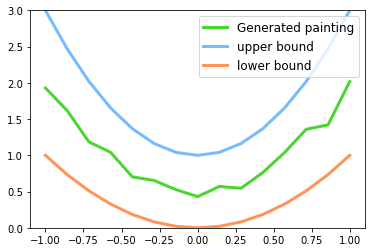

In [9]:
fake_in = np.random.randn(BATCH_SIZE, INPUT_DIM)
fake_out = generator.predict(fake_in)

plt.plot(OUTPUT[0], fake_out[0], c='#4AD631', lw=3, label='Generated painting',)
plt.plot(OUTPUT[0], 2 * np.power(OUTPUT[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(OUTPUT[0], 1 * np.power(OUTPUT[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.ylim((0, 3)); plt.legend(loc='upper right', fontsize=12)
plt.show()